In [1]:
import torch
import torch.nn as nn
import numpy as np

import datasets.datasets as dtset
import utils.losses as losses

from utils.weakener import Weakener
from models.model import MLP

from utils.trainig_testing import train_and_evaluate

import pickle
import matplotlib.pyplot as plt

In [22]:
Palette = ['viridis', 'plasma', 'inferno', 'magma', 'cividis', 'tab10', 'tab20']
palette = 'tab10'
num_colors = 11

cmap = plt.get_cmap(palette)
colors = [cmap(i) for i in range(num_colors)]
colors


[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0),
 (1.0, 0.4980392156862745, 0.054901960784313725, 1.0),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313, 1.0),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392, 1.0),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353, 1.0),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354, 1.0),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745, 1.0),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333, 1.0),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529, 1.0),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529, 1.0)]

# NOT TO DO IN RESUTS(0.2) BECAUSE OUTPUTS ARE NOT CORRECT
TRY TO GET ALL AND RERUN THIS

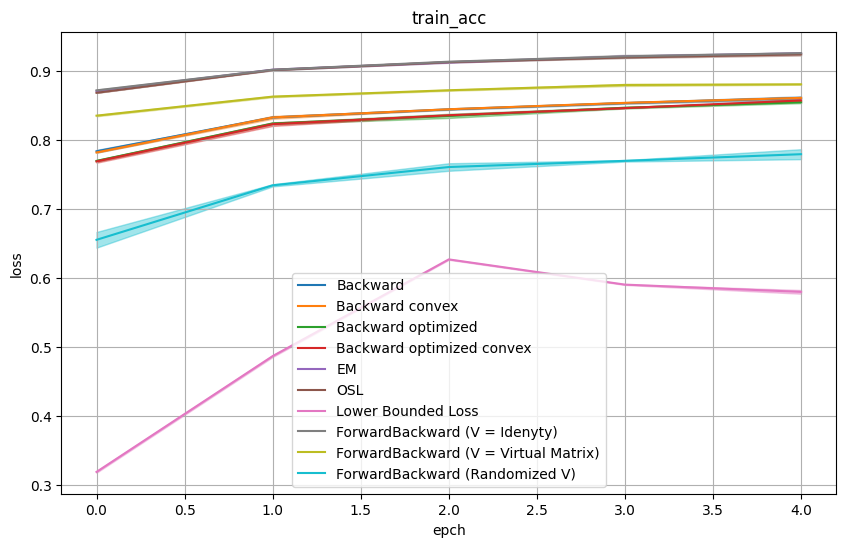

In [8]:
#Methods = ['Back','Back_conv','Back_opt','Back_opt_conv','EM','OSL','LBL','Forward','ForwardBackward_I','ForwardBackward_Y','ForwardBackward_V']
#Names = ['Backward','Backward convex','Backward optimized','Backward optimized convex','EM','OSL','Lower Bounded Loss',
#        'Forward','ForwardBackward (V = Idenyty)','ForwardBackward (V = Virtual Matrix)','ForwardBackward (Randomized V)']
Methods = ['Back','Back_conv','Back_opt','Back_opt_conv','EM','OSL','LBL','ForwardBackward_I','ForwardBackward_Y','ForwardBackward_V']
Names = ['Backward','Backward convex','Backward optimized','Backward optimized convex','EM','OSL','Lower Bounded Loss','ForwardBackward (V = Idenyty)','ForwardBackward (V = Virtual Matrix)','ForwardBackward (Randomized V)']


Palette = ['viridis', 'plasma', 'inferno', 'magma', 'cividis', 'tab10', 'tab20']
palette = 'tab10'
num_colors = len(Methods)

cmap = plt.get_cmap(palette)
colors = [cmap(i) for i in range(num_colors)]
colors

Graphics = ['train_loss','train_acc','test_acc','train_detached_loss']
graphic = 'train_acc'

plt.figure(figsize=(10, 6))
for e,method in enumerate(Methods):
    file = f"Experimental_results(0.2)/{method}.pkl"
    f = open(file,"rb")
    k = pickle.load(f)
    k = k['overall_results']
    series = torch.vstack(tuple((k[i][graphic] for i in range(len(k)))))

    mean_series = torch.mean(series, dim=0).numpy()
    std_series = torch.std(series, dim=0).numpy()

    plt.plot(mean_series, label = Names[e], color=colors[e])
    plt.fill_between(range(mean_series.shape[0]), mean_series-std_series, mean_series+std_series, color=colors[e], alpha=0.4)
plt.title(graphic)
plt.xlabel('epch')
plt.ylabel('loss')
plt.legend()
plt.grid(True)
plt.show()




In [16]:
f = open("Experimental_results(0.3)/Back.pkl","rb")
k= pickle.load(f)
k['overall_results']


{0: {'train_loss': tensor([1.6741, 1.5483, 1.5231, 1.4987, 1.4767]),
  'train_acc': tensor([0.7003, 0.7627, 0.7804, 0.7933, 0.8055]),
  'test_acc': tensor([0.8010, 0.8582, 0.8718, 0.8618, 0.8632]),
  'train_detached_loss': tensor([0.0555, 0.0483, 0.0469, 0.0500, 0.0502])},
 1: {'train_loss': tensor([1.6760, 1.5498, 1.5246, 1.4992, 1.4799]),
  'train_acc': tensor([0.6971, 0.7593, 0.7783, 0.7941, 0.8069]),
  'test_acc': tensor([0.8483, 0.8296, 0.8608, 0.8769, 0.8850]),
  'train_detached_loss': tensor([0.0525, 0.0526, 0.0517, 0.0515, 0.0467])}}

In [12]:
Tr_loss_back_opt_conv = torch.vstack(tuple((k['overall_results'][i]['train_loss'] for i in range(2))))

In [13]:
Tr_loss_back_opt_conv

tensor([[1.6741, 1.5483, 1.5231, 1.4987, 1.4767],
        [1.6760, 1.5498, 1.5246, 1.4992, 1.4799]])

In [12]:
f = open("Experimental_results(0.2)/Back.pkl","rb")
R = pickle.load(f)
f.close()
r = R['overall_results']['train_detached_loss']

Tr_loss_back = torch.vstack(tuple((r[i]['train_detached_loss'] for i in range(3))))
Tr_acc_back = torch.vstack(tuple((r[i]['train_acc'] for i in range(3))))
Te_acc_back = torch.vstack(tuple((r[i]['test_acc'] for i in range(3))))

KeyError: 0

In [33]:
f = open("Experimental_results(0.2)/Back_opt.pkl","rb")
R = pickle.load(f)
f.close()
r = R['overall_results']['train_detached_loss']

Tr_loss_back_opt = torch.vstack(tuple((r[i]['train_detached_loss'] for i in range(3))))
Tr_acc_back_opt = torch.vstack(tuple((r[i]['train_acc'] for i in range(3))))
Te_acc_back_opt = torch.vstack(tuple((r[i]['test_acc'] for i in range(3))))


In [37]:
f = open("Experimental_results(0.2)/Back_conv.pkl","rb")
Back_conv,Back_model_conv = pickle.load(f)
f.close()

Tr_loss_back_conv = torch.vstack(tuple((Back_conv[i]['train_loss'] for i in range(3))))
Tr_acc_back_conv = torch.vstack(tuple((Back_conv[i]['train_acc'] for i in range(3))))
Te_acc_back_conv = torch.vstack(tuple((Back_conv[i]['test_acc'] for i in range(3))))

In [ ]:
f = open("Experimental_results(0.2)/Back_opt_conv.pkl","rb")
Back_opt_conv,Back_model_opt_conv = pickle.load(f)
f.close()

Tr_loss_back_opt_conv = torch.vstack(tuple((Back_opt_conv[i]['train_loss'] for i in range(3))))
Tr_acc_back_opt_conv = torch.vstack(tuple((Back_opt_conv[i]['train_acc'] for i in range(3))))
Te_acc_back_opt_conv = torch.vstack(tuple((Back_opt_conv[i]['test_acc'] for i in range(3))))

In [43]:
f = open("Experimental_results(0.2)/EM.pkl","rb")
EM,EM_model = pickle.load(f)
f.close()

Tr_loss_EM = torch.vstack(tuple((EM[i]['train_loss'] for i in range(3))))
Tr_acc_EM = torch.vstack(tuple((EM[i]['train_acc'] for i in range(3))))
Te_acc_EM = torch.vstack(tuple((EM[i]['test_acc'] for i in range(3))))

In [47]:
f = open("Experimental_results(0.2)/OSL.pkl","rb")
OSL,OSL_model = pickle.load(f)
f.close()

Tr_loss_OSL = torch.vstack(tuple((OSL[i]['train_loss'] for i in range(3))))
Tr_acc_OSL = torch.vstack(tuple((OSL[i]['train_acc'] for i in range(3))))
Te_acc_OSL = torch.vstack(tuple((OSL[i]['test_acc'] for i in range(3))))

In [ ]:
f = open("Experimental_results(0.2)/Forward.pkl","rb")
FWD,FWD_model = pickle.load(f)
f.close()

Tr_loss_FWD = torch.vstack(tuple((FWD[i]['train_loss'] for i in range(3))))
Tr_acc_FWD = torch.vstack(tuple((FWD[i]['train_acc'] for i in range(3))))
Te_acc_FWD = torch.vstack(tuple((FWD[i]['test_acc'] for i in range(3))))

In [ ]:
f = open("Experimental_results(0.2)/ForwardBackward_I.pkl","rb")
FB_I,FBI_model = pickle.load(f)
f.close()

Tr_loss_FB_I = torch.vstack(tuple((FB_I[i]['train_loss'] for i in range(3))))
Tr_acc_FB_I = torch.vstack(tuple((FB_I[i]['train_acc'] for i in range(3))))
Te_acc_FB_I = torch.vstack(tuple((FB_I[i]['test_acc'] for i in range(3))))

In [ ]:
f = open("Experimental_results(0.2)/ForwardBackward_Y.pkl","rb")
FB_Y,FBY_model = pickle.load(f)
f.close()

Tr_loss_FB_Y = torch.vstack(tuple((FB_Y[i]['train_loss'] for i in range(3))))
Tr_acc_FB_Y = torch.vstack(tuple((FB_Y[i]['train_acc'] for i in range(3))))
Te_acc_FB_Y = torch.vstack(tuple((FB_Y[i]['test_acc'] for i in range(3))))

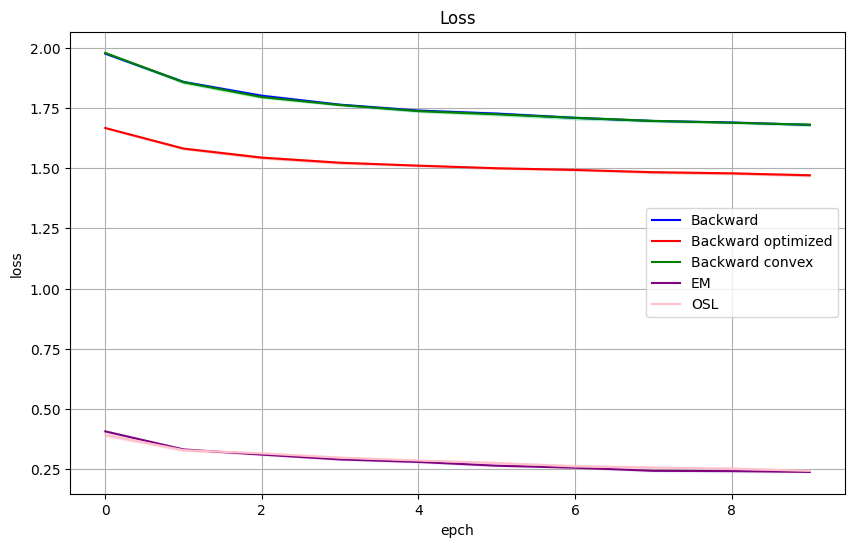

In [52]:
mlb = torch.mean(Tr_loss_back, dim=0).numpy()
slb = torch.std(Tr_loss_back, dim=0).numpy()
mlbo = torch.mean(Tr_loss_back_opt, dim=0).numpy()
slbo = torch.std(Tr_loss_back_opt, dim=0).numpy()
mlbc = torch.mean(Tr_loss_back_conv, dim=0).numpy()
slbc = torch.std(Tr_loss_back_conv, dim=0).numpy()
mem = torch.mean(Tr_loss_EM, dim=0).numpy()
sem = torch.std(Tr_loss_EM, dim=0).numpy()
mosl = torch.mean(Tr_loss_OSL, dim=0).numpy()
sosl = torch.std(Tr_loss_OSL, dim=0).numpy()



mosl = torch.mean(Tr_loss_OSL, dim=0).numpy()
sosl = torch.std(Tr_loss_OSL, dim=0).numpy()
mosl = torch.mean(Tr_loss_OSL, dim=0).numpy()
sosl = torch.std(Tr_loss_OSL, dim=0).numpy()
mosl = torch.mean(Tr_loss_OSL, dim=0).numpy()
sosl = torch.std(Tr_loss_OSL, dim=0).numpy()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(mlb, label='Backward', color='blue')
plt.plot(mlbo, label='Backward optimized', color='red')
plt.plot(mlbc, label='Backward convex', color='green')
plt.plot(mem, label='EM', color='purple')
plt.plot(mosl, label='OSL', color='pink')

plt.fill_between(range(mlb.shape[0]), mlb-slb, mlb+slb, color='skyblue', alpha=0.4)
plt.fill_between(range(mlbo.shape[0]), mlbo-slbo, mlbo+slbo, color='lightcoral', alpha=0.4)
plt.fill_between(range(mlbo.shape[0]), mlbc-slbc, mlbc+slbc, color='lightgreen', alpha=0.4)
plt.fill_between(range(mlbo.shape[0]), mem-sem, mem+sem, color='lavender', alpha=0.4)
plt.fill_between(range(mlbo.shape[0]), mosl-sosl, mosl+sosl, color='lightpink', alpha=0.4)

plt.title('Loss')
plt.xlabel('epch')
plt.ylabel('loss')
plt.legend()
plt.grid(True)
plt.show()

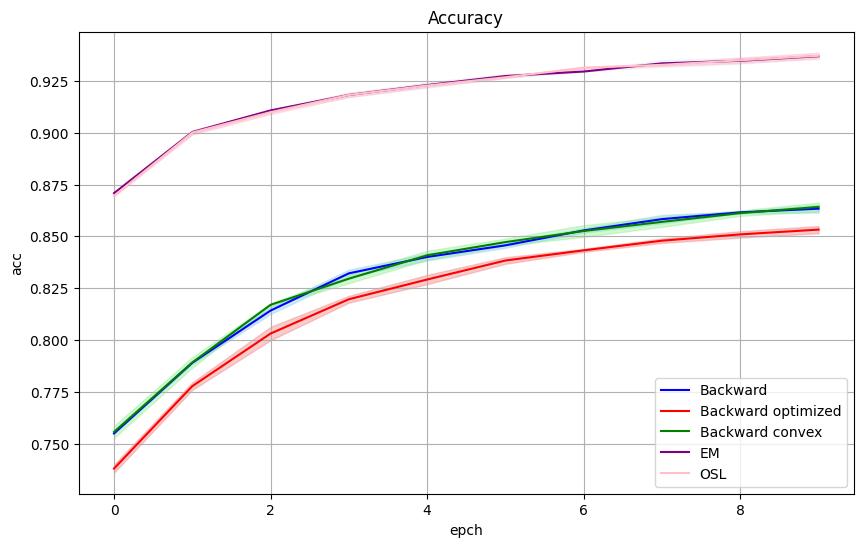

In [53]:
mlb = torch.mean(Tr_acc_back, dim=0).numpy()
slb = torch.std(Tr_acc_back, dim=0).numpy()
mlbo = torch.mean(Tr_acc_back_opt, dim=0).numpy()
slbo = torch.std(Tr_acc_back_opt, dim=0).numpy()
mlbc = torch.mean(Tr_acc_back_conv, dim=0).numpy()
slbc = torch.std(Tr_acc_back_conv, dim=0).numpy()
mem = torch.mean(Tr_acc_EM, dim=0).numpy()
sem = torch.std(Tr_acc_EM, dim=0).numpy()
mosl = torch.mean(Tr_acc_OSL, dim=0).numpy()
sosl = torch.std(Tr_acc_OSL, dim=0).numpy()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(mlb, label='Backward', color='blue')
plt.plot(mlbo, label='Backward optimized', color='red')
plt.plot(mlbc, label='Backward convex', color='green')
plt.plot(mem, label='EM', color='purple')
plt.plot(mosl, label='OSL', color='pink')

plt.fill_between(range(mlb.shape[0]), mlb-slb, mlb+slb, color='skyblue', alpha=0.4)
plt.fill_between(range(mlbo.shape[0]), mlbo-slbo, mlbo+slbo, color='lightcoral', alpha=0.4)
plt.fill_between(range(mlbo.shape[0]), mlbc-slbc, mlbc+slbc, color='lightgreen', alpha=0.4)
plt.fill_between(range(mlbo.shape[0]), mem-sem, mem+sem, color='lavender', alpha=0.4)
plt.fill_between(range(mlbo.shape[0]), mosl-sosl, mosl+sosl, color='lightpink', alpha=0.4)

plt.title('Accuracy')
plt.xlabel('epch')
plt.ylabel('acc')
plt.legend()
plt.grid(True)
plt.show()